In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Modelos analitica/Criticidad_VRP.xlsx" #Se ingresa la ruta de Drive en donde se tenga la información

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_excel(path)

In [ ]:
datos.head(10)

,IPID,NFALLA,MTBF,EDAD,DIAMETRO,DELTA_PRESION,PRESION_PTO_BAJO_FALLA,INDICE_CAVITACION_ESTIMADO,MARCA,CIRCUITO
0,9994969,1,3.0,2.016438,50,66,119.710,0.636364,CLAVAL,CORAZÓN
1,4658158,2,5.0,2.043836,75,35,115.720,0.514286,BERMAD,LA MONTAÑA
2,2025700,3,7.0,1.315068,100,32,110.100,1.125000,SINGER,GIRARDOTA
3,9976218,2,8.0,2.526027,50,62,114.568,0.483871,CLAVAL,EL TOTUMO
4,2665443,23,12.0,29.320548,50,51,106.560,0.490196,SINGER,PICACHO
5,9943776,3,12.0,3.019178,100,79,157.690,0.189873,CLAVAL,CORAZÓN ALTO
6,9996296,2,13.5,24.400000,150,68,133.570,0.367647,CLAVAL,ALTAVISTA SUR
7,4600988,6,16.6,1.723288,200,54,110.100,0.370370,CLAVAL,GERONA
8,2585486,6,19.0,1.668493,150,48,132.540,0.458333,SINGER,LOS PARRAS
9,9992444,3,19.0,2.084932,150,63,169.150,0.634921,CLAVAL,PARIS


In [ ]:
X = datos.drop(['IPID','MARCA','CIRCUITO'],axis=1)

In [ ]:
X.head(10)

,NFALLA,MTBF,EDAD,DIAMETRO,DELTA_PRESION,PRESION_PTO_BAJO_FALLA,INDICE_CAVITACION_ESTIMADO
0,1,3.0,2.016438,50,66,119.710,0.636364
1,2,5.0,2.043836,75,35,115.720,0.514286
2,3,7.0,1.315068,100,32,110.100,1.125000
3,2,8.0,2.526027,50,62,114.568,0.483871
4,23,12.0,29.320548,50,51,106.560,0.490196
5,3,12.0,3.019178,100,79,157.690,0.189873
6,2,13.5,24.400000,150,68,133.570,0.367647
7,6,16.6,1.723288,200,54,110.100,0.370370
8,6,19.0,1.668493,150,48,132.540,0.458333
9,3,19.0,2.084932,150,63,169.150,0.634921


In [ ]:
from sklearn import preprocessing

In [ ]:
X_esc  = preprocessing.Normalizer().fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt

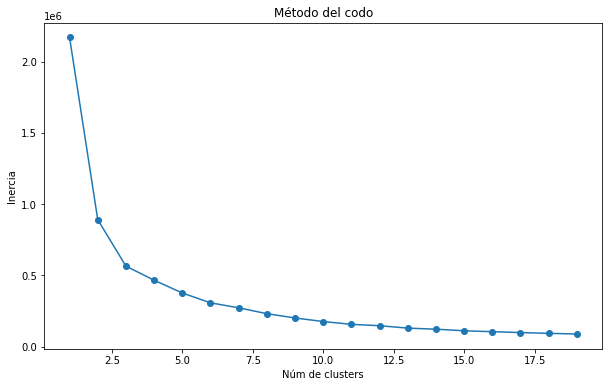

In [ ]:
inercia = []
for i in range(1, 20):
  algoritmo = KMeans(n_clusters = i)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

plt.figure(figsize=[10,6])
plt.title('Método del codo')
plt.xlabel('Núm de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia, marker='o')
plt.show()

In [ ]:
algoritmo = KMeans(n_clusters=3)

In [ ]:
algoritmo.fit(X)

KMeans(n_clusters=3)

In [ ]:
X['cluster'] = algoritmo.predict(X)
X.head(10)

,NFALLA,MTBF,EDAD,DIAMETRO,DELTA_PRESION,PRESION_PTO_BAJO_FALLA,INDICE_CAVITACION_ESTIMADO,cluster
0,1,3.0,2.016438,50,66,119.710,0.636364,0
1,2,5.0,2.043836,75,35,115.720,0.514286,0
2,3,7.0,1.315068,100,32,110.100,1.125000,0
3,2,8.0,2.526027,50,62,114.568,0.483871,0
4,23,12.0,29.320548,50,51,106.560,0.490196,0
5,3,12.0,3.019178,100,79,157.690,0.189873,0
6,2,13.5,24.400000,150,68,133.570,0.367647,0
7,6,16.6,1.723288,200,54,110.100,0.370370,0
8,6,19.0,1.668493,150,48,132.540,0.458333,0
9,3,19.0,2.084932,150,63,169.150,0.634921,0


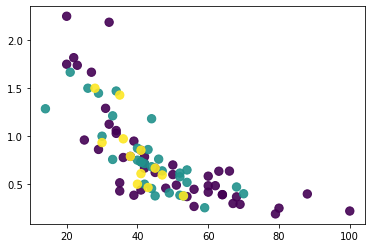

In [ ]:
plt.scatter(X['DELTA_PRESION'], X['INDICE_CAVITACION_ESTIMADO'], c=X['cluster'], alpha = 0.9, s=70)

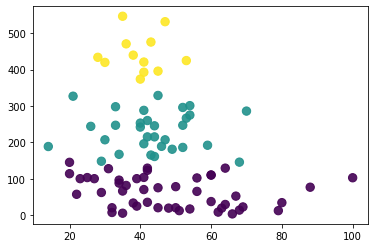

In [ ]:
plt.scatter(X['DELTA_PRESION'], X['MTBF'], c=X['cluster'], alpha = 0.9, s=70)

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(X, x=X['DELTA_PRESION'], y=X['INDICE_CAVITACION_ESTIMADO'], z=X['MTBF'], 
              color=X['cluster'], color_discrete_map = {0: "blue", 1: "pink"})

In [ ]:
fig = px.parallel_coordinates(X.loc[:,['DELTA_PRESION', 'MTBF','INDICE_CAVITACION_ESTIMADO', 'cluster']], 
color='cluster',color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()

In [ ]:
datos_gb = X.groupby('cluster',as_index=False).mean()
datos_gb

,cluster,NFALLA,MTBF,EDAD,DIAMETRO,DELTA_PRESION,PRESION_PTO_BAJO_FALLA,INDICE_CAVITACION_ESTIMADO
0,0,5.723404,62.862766,3.591081,139.893617,48.170213,120.805995,0.759475
1,1,4.741935,231.225806,5.817093,105.645161,43.290323,112.486710,0.782360
2,2,4.000000,444.083333,4.109817,79.166667,39.750000,110.146346,0.807658


In [ ]:
fig = px.box(X, x="cluster", y="MTBF", color="cluster")
fig.update_traces(quartilemethod="exclusive")

In [ ]:
fig = px.parallel_coordinates(datos_gb.loc[:,['NFALLA','DELTA_PRESION', 'MTBF','INDICE_CAVITACION_ESTIMADO','PRESION_PTO_BAJO_FALLA','DIAMETRO','cluster']], 
color='cluster',color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=1.0)
fig.show()